In [1]:
import time
import numpy as np
import tensorflow as tf

from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split, KFold

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from utilities import *

In [2]:
mnist = fetch_mldata( "MNIST original" )
trainX, testX, trainY, testY = train_test_split( mnist.data, mnist.target, test_size = 10000,
                                           random_state = 123 )

In [3]:
hTrX, hTrY = trainX[ trainY < 5 ], trainY[ trainY < 5 ]
hTeX, hTeY = testX[ testY < 5 ], testY[ testY < 5 ]

_, n = hTeX.shape

In [4]:
#nines = [ 0.88, 0.89, 0.9, 0.91, 0.92 ]
#paramsList = [ { "nOut" : 5, "nl" : 5, "nh" : 100, "alpha" : a, "b1" : b1, "b2" : 0.99 } for a in np.logspace(-4,-2, 5) for b1 in nines ]

trHist, vlHist, bestParams = hyperparameterSearch( hTrX, hTrY, [{ 'nOut': 5, 'nl': 5,
                                                                 'nh': 100, 'alpha': 0.0031622776601683794,
                                                                 'b1': 0.9, 'b2': 0.99} ], 3 )

Done 1 of 1 in 248.56523323059082s


In [5]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape = (None, n), name = "X")
y = tf.placeholder(tf.int32, shape = (None), name = "y")
trn = tf.placeholder_with_default( False, shape = (), name = "trn" )

loss, training, accuracy, lossSummary, init, saver = mnistClassifier( X, y, trn, **bestParams )

with tf.Session() as sess:

    saver.restore( sess, "./mnist-best.ckpt" )
    testAcc = accuracy.eval( feed_dict = { X : hTeX, y : hTeY })

    print( "Accuracy on test set:", testAcc )

INFO:tensorflow:Restoring parameters from ./mnist-best.ckpt
Accuracy on test set: 0.9518591


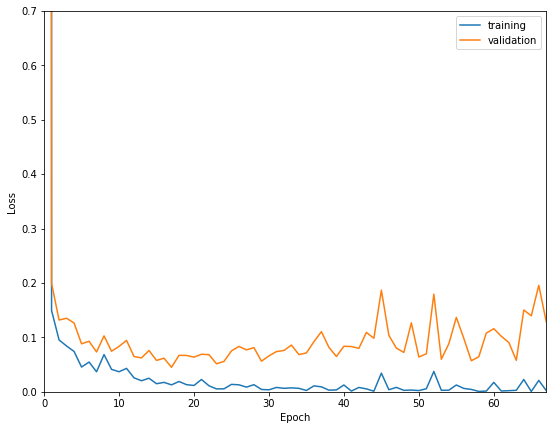

In [6]:
fig = plt.figure( 1, (9, 7) )

plt.plot( trHist[:], label = "training" )
plt.plot( vlHist[:], label = "validation" )

plt.xlim( xmin = 0, xmax = len(trHist) - 1 )
plt.ylim( ymin = 0, ymax = max(trHist[1], vlHist[1]) + .5 )

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend( loc = "best" )

plt.show()

fig.savefig( "learningBN.eps", format = 'eps', dpi = 20000, bbox_inches = 'tight' )

In [7]:
bestParams

{'nOut': 5,
 'nl': 5,
 'nh': 100,
 'alpha': 0.0031622776601683794,
 'b1': 0.9,
 'b2': 0.99}

{'nOut': 5,
 'nl': 5,
 'nh': 100,
 'alpha': 0.0031622776601683794,
 'b1': 0.9,
 'b2': 0.99}
 
 0.9898239